# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [3]:
df=pd.read_csv('./data/comprar_alquilar.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [4]:
df.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


In [6]:
df.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [7]:
df['estado_civil'].value_counts()

estado_civil
2    73
0    68
1    61
Name: count, dtype: int64

In [8]:
df['trabajo'].value_counts()

trabajo
5    31
8    29
7    27
6    23
3    21
4    19
2    18
1    18
0    16
Name: count, dtype: int64

In [9]:
df.groupby('trabajo')['ingresos'].mean()

trabajo
0    5393.750000
1    4665.666667
2    4533.166667
3    5341.761905
4    5109.368421
5    5139.032258
6    4940.391304
7    4704.148148
8    4849.379310
Name: ingresos, dtype: float64

### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

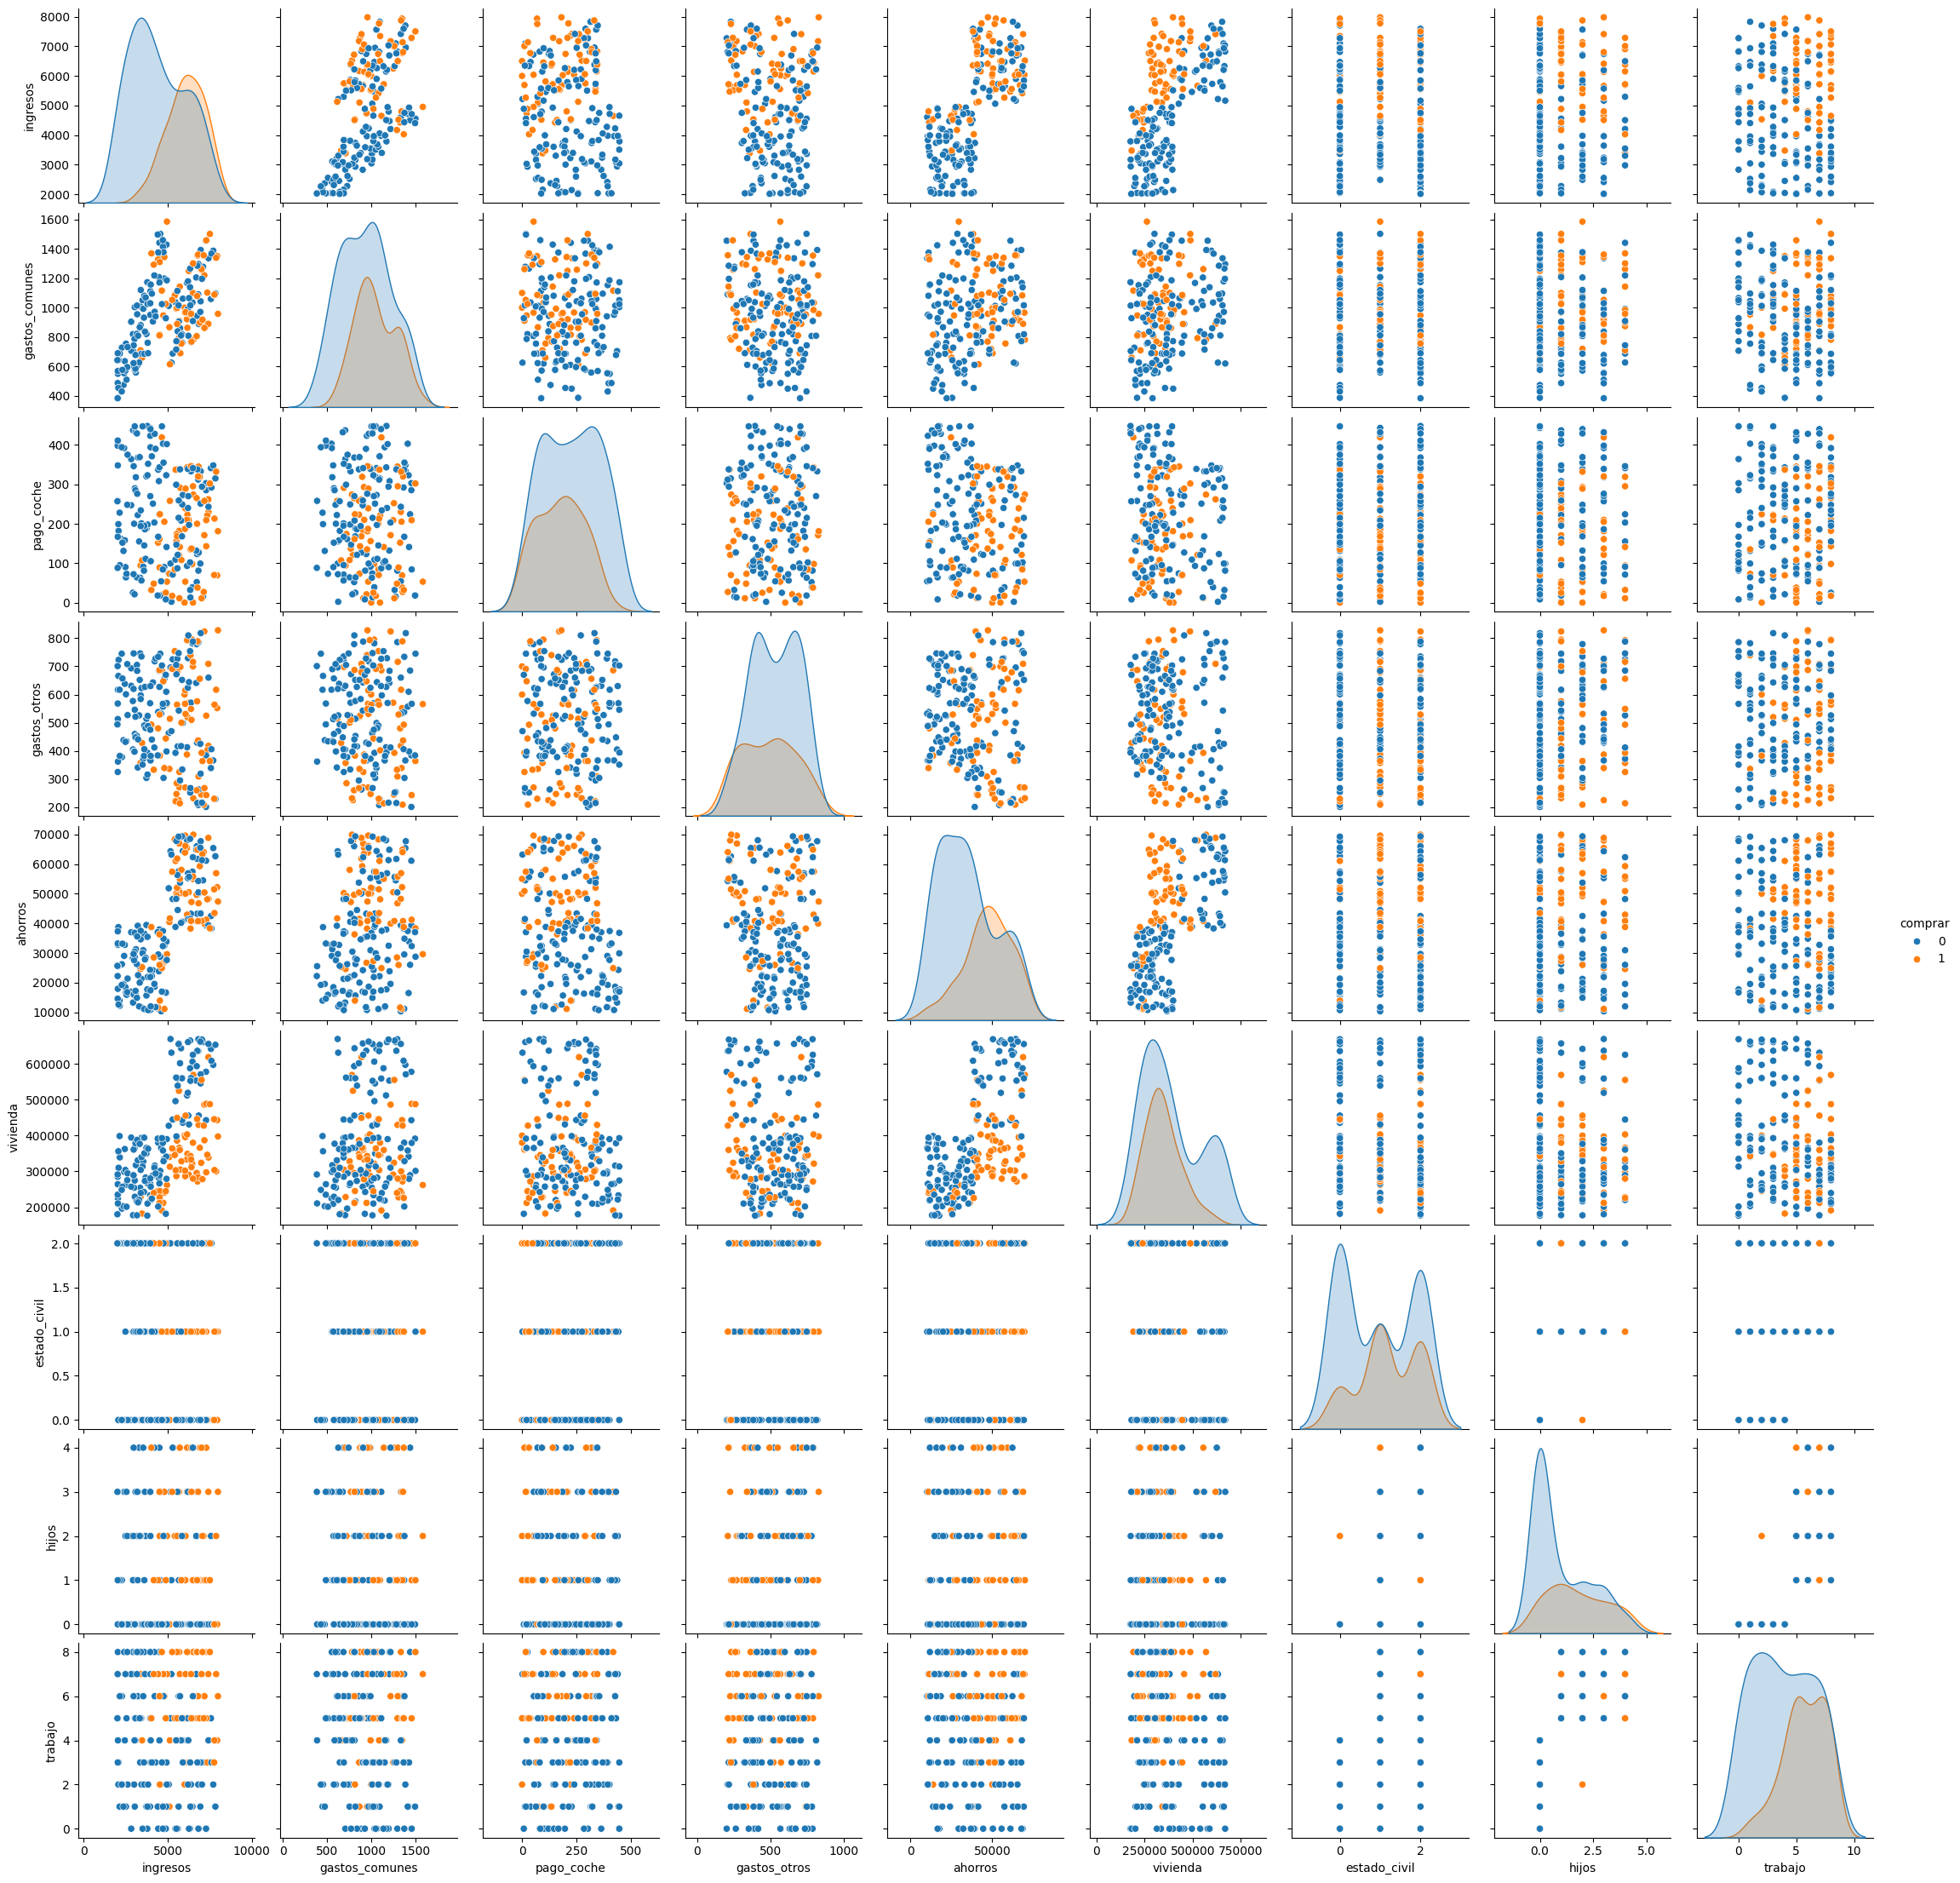

In [11]:
sns.pairplot(df, hue='comprar');

In [13]:
df.columns

Index(['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros',
       'vivienda', 'estado_civil', 'hijos', 'trabajo', 'comprar'],
      dtype='object')

In [14]:
df_datos=df[['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros',
       'vivienda']]
df_datos

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda
0,6000,1000,0,600,50000,400000
1,6745,944,123,429,43240,636897
2,6455,1033,98,795,57463,321779
3,7098,1278,15,254,54506,660933
4,6167,863,223,520,41512,348932
...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120
198,3961,1030,270,475,21880,280421
199,3184,955,276,684,35565,388025
200,3334,867,369,652,19985,376892


In [17]:
df['comprar'].value_counts() #vemos que el problema NO esta valanceado

comprar
0    135
1     67
Name: count, dtype: int64

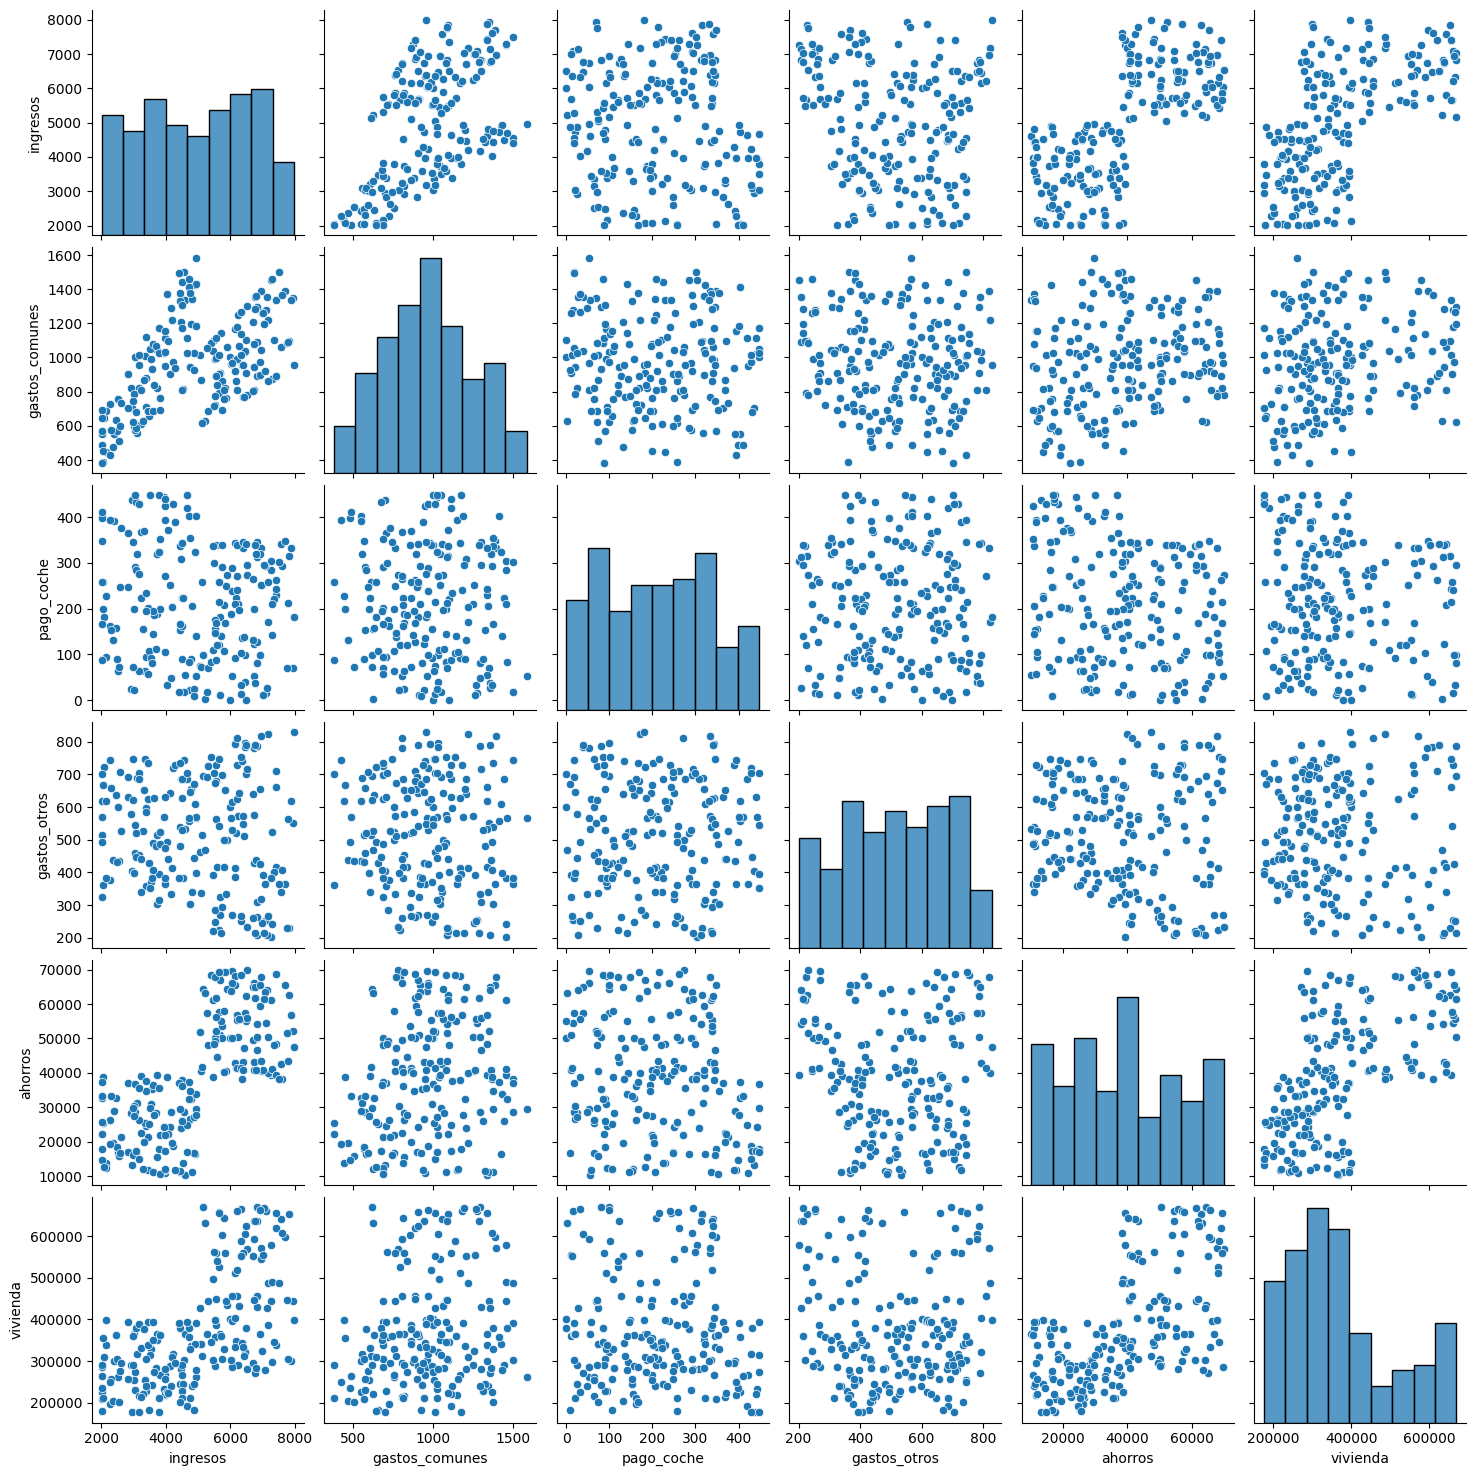

In [16]:
sns.pairplot(df_datos)

<Axes: >

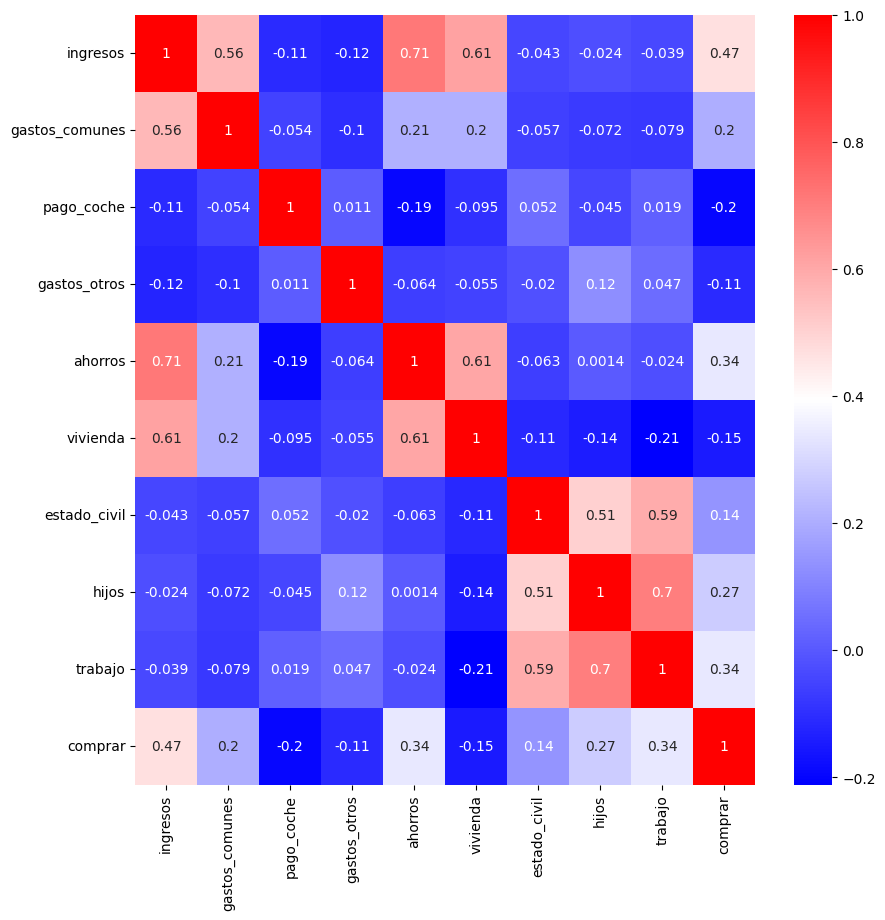

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='bwr')

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [23]:
X=df.drop('comprar',axis=1)
y=df.comprar

In [24]:
estandarizado=StandardScaler()
x_escalado=estandarizado.fit_transform(X)


In [26]:
x_escalado.shape

(202, 9)

In [37]:
df_datos.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda
0,6000,1000,0,600,50000,400000
1,6745,944,123,429,43240,636897
2,6455,1033,98,795,57463,321779
3,7098,1278,15,254,54506,660933
4,6167,863,223,520,41512,348932


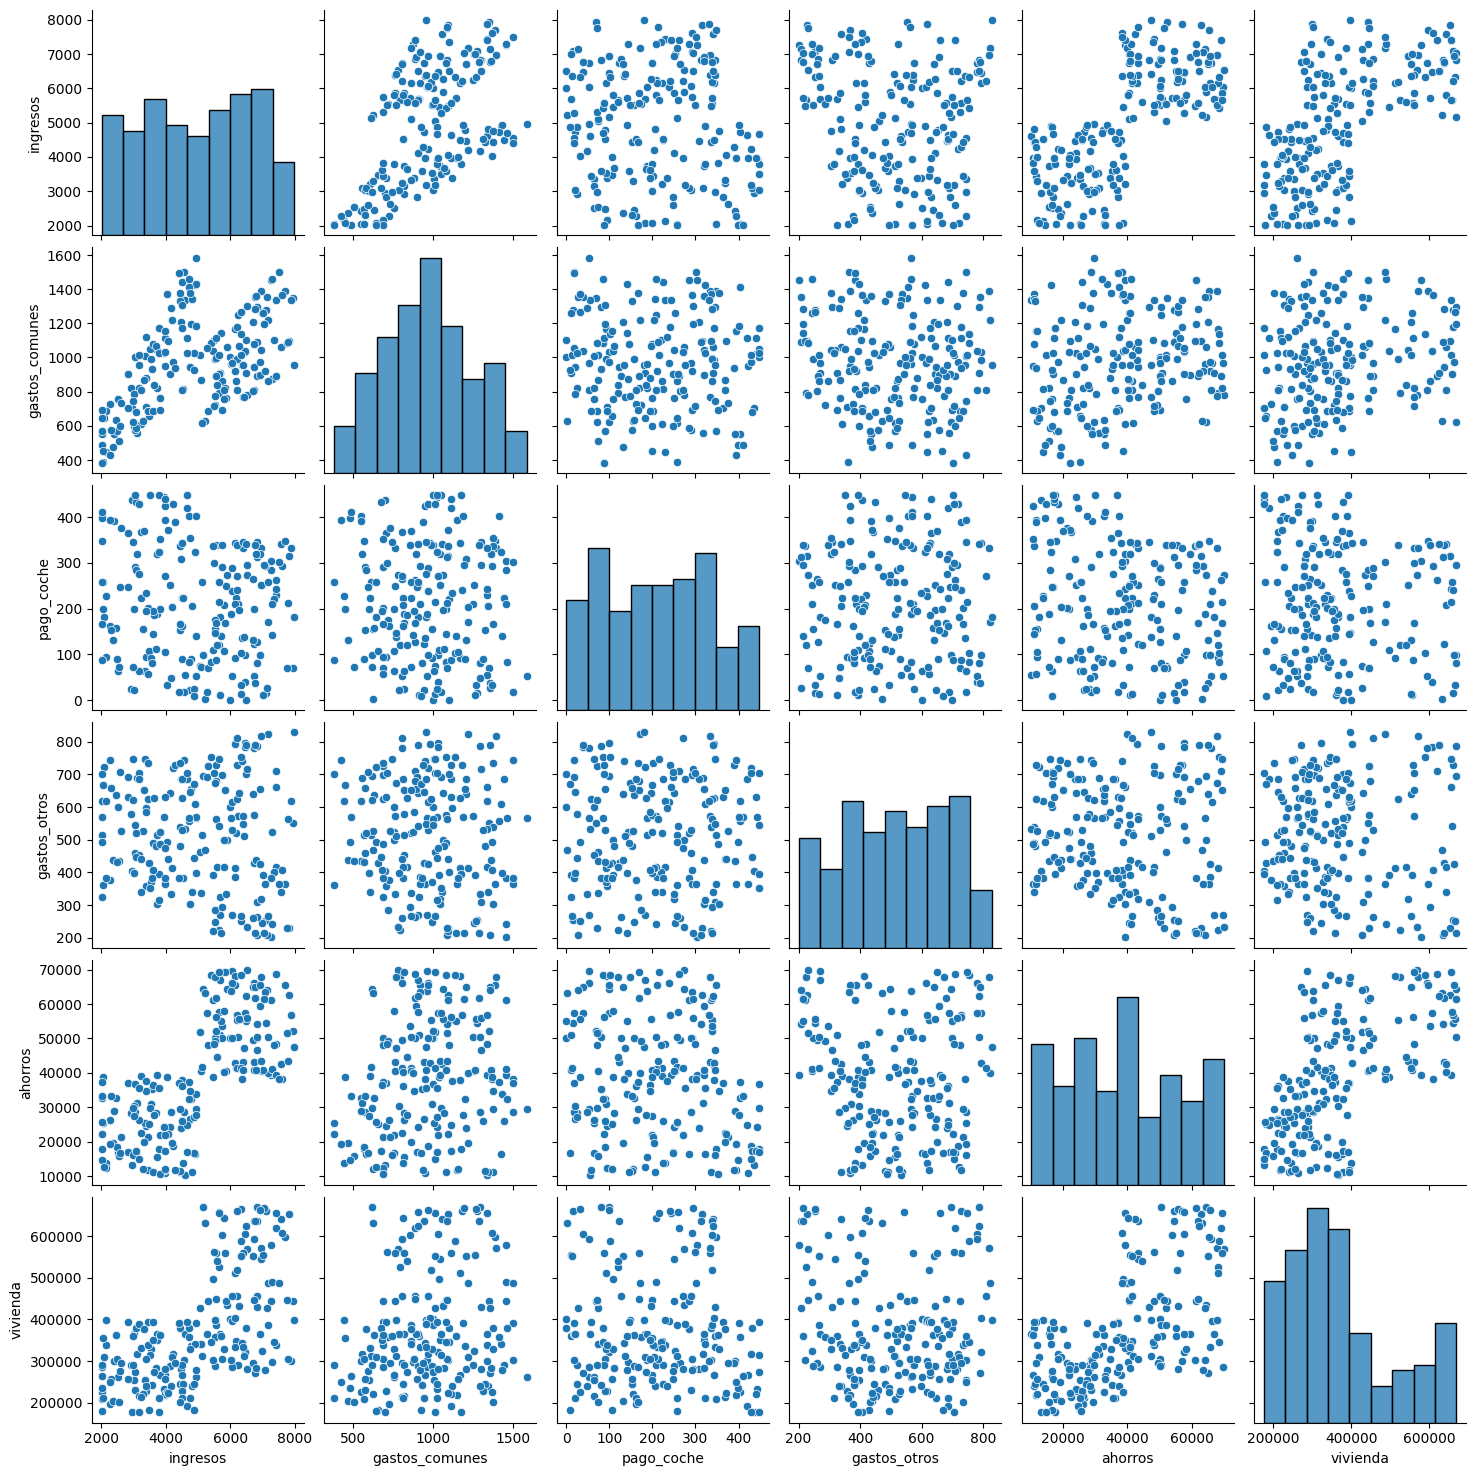

In [38]:
sns.pairplot(df_datos)

## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [28]:
modelo_pca=PCA(n_components=9)
x_pca=modelo_pca.fit_transform(x_escalado)

In [30]:
x_pca

array([[-1.32191526, -0.22295045, -1.59986259, ..., -0.31803061,
         0.75180934,  0.26998397],
       [-1.14787775,  1.7169673 , -0.39572194, ..., -1.54248744,
        -0.22179854,  0.43842516],
       [-0.09036864,  1.83606627, -1.35938166, ...,  1.54049502,
        -0.66811958,  0.15346276],
       ...,
       [ 1.48146407,  0.9759    , -0.63757791, ..., -0.66224764,
        -0.43775508, -0.79636925],
       [ 1.51463264, -0.39217592, -0.00570993, ..., -0.82004012,
        -0.05571045, -0.14376766],
       [ 0.35346394, -1.72020938,  0.60988792, ..., -0.3963229 ,
        -0.73154396,  0.18661762]])

In [29]:
modelo_pca.components_

array([[-4.93720326e-01, -3.18228652e-01,  1.23770585e-01,
         1.11875722e-01, -4.44650306e-01, -4.62608605e-01,
         2.52278902e-01,  2.59858682e-01,  2.90247540e-01],
       [ 3.06958523e-01,  1.47372634e-01, -9.16409584e-02,
         1.11593405e-04,  2.88434882e-01,  1.48984886e-01,
         4.69043960e-01,  5.21893872e-01,  5.27155638e-01],
       [ 9.14192492e-02,  3.63453156e-01,  5.16144106e-01,
        -7.01985912e-01, -1.91767355e-01, -1.40513292e-01,
         1.72884784e-01, -1.12183561e-01,  3.69101842e-02],
       [ 1.11222044e-01,  8.16296251e-02,  7.80267686e-01,
         5.90704378e-01,  2.28391302e-02,  1.50085403e-01,
        -7.66309571e-03,  7.40404830e-03, -7.49271067e-03],
       [ 8.88965452e-02,  7.63005855e-01, -2.65553621e-01,
         3.30743735e-01, -2.89002223e-01, -3.65555555e-01,
        -1.04638865e-01,  4.36678973e-02,  8.65473020e-06],
       [-7.54772584e-02,  6.79027972e-02, -1.53696523e-01,
         1.54422329e-01, -2.30180519e-01,  2.907985

### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [31]:
pd.DataFrame(
    data = modelo_pca.components_,
    columns = df.columns,
    index = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9']
)

ValueError: Shape of passed values is (9, 9), indices imply (9, 10)

In [32]:
modelo_pca.explained_variance_ratio_

array([0.29913557, 0.23294923, 0.11711241, 0.10685622, 0.09635279,
       0.05629866, 0.04145579, 0.03017819, 0.01966115])

In [34]:
modelo_pca.explained_variance_ratio_

array([0.29913557, 0.23294923, 0.11711241, 0.10685622, 0.09635279,
       0.05629866, 0.04145579, 0.03017819, 0.01966115])

In [35]:
modelo_pca.explained_variance_ratio_.cumsum() #suma acumulada

array([0.29913557, 0.5320848 , 0.64919721, 0.75605343, 0.85240621,
       0.90870487, 0.95016066, 0.98033885, 1.        ])

In [36]:
modelo_pca.explained_variance_ratio_.cumsum() [0:5]

array([0.29913557, 0.5320848 , 0.64919721, 0.75605343, 0.85240621])

Con 5 componentes principales:

In [22]:
modelo_pca=PCA(n_components=5)
modelo_pca.fit(df)

PCA(n_components=5)

In [23]:
pd.DataFrame(
    data = modelo_pca.components_,
    columns = df.columns,
    index = ['PC1', 'PC2', 'PC3', 'PC4','PC5']
)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
PC1,0.007605,0.000409,-0.000088,-0.000067,0.077707,0.996947,-6.938021e-07,-0.000001,-0.000004,-4.892925e-07
PC2,0.051962,0.002134,-0.001540,-0.000480,0.995595,-0.077999,4.964107e-07,0.000011,0.000024,1.857413e-05
PC3,-0.987637,-0.146760,-0.003587,0.017062,0.052140,0.003531,-2.561895e-05,-0.000025,-0.000111,-2.036262e-04
PC4,-0.147051,0.987046,-0.042547,-0.047679,0.005493,0.000282,-2.925452e-04,-0.000607,-0.001304,-3.557135e-04
PC5,0.009867,0.049679,-0.000832,0.998715,-0.000142,-0.000017,-1.346163e-04,0.000982,0.000620,-1.453667e-04


### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

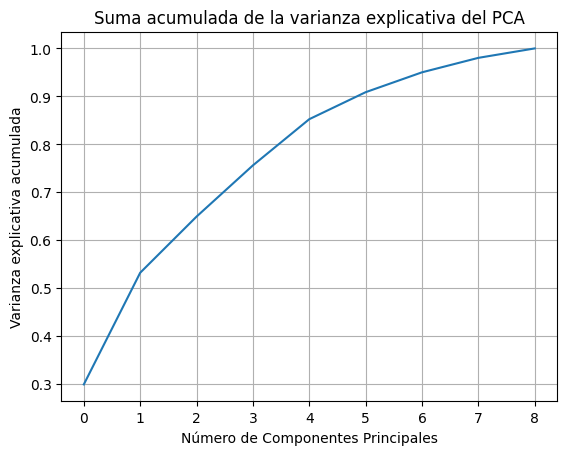

In [37]:
varianza_acumulada=np.cumsum(modelo_pca.explained_variance_ratio_)

plt.plot(varianza_acumulada)
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza explicativa acumulada')
plt.title('Suma acumulada de la varianza explicativa del PCA')
plt.grid(True)
plt.show()

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------


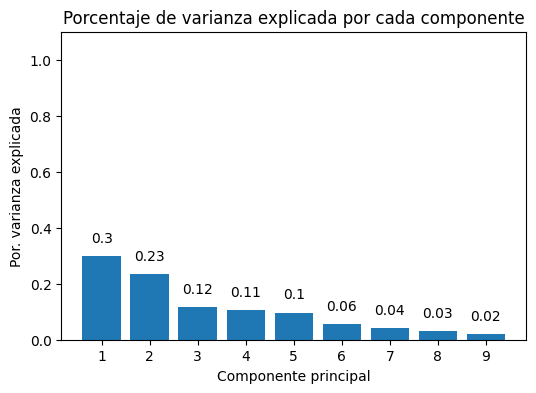

In [39]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
#### CODE ####

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (9).

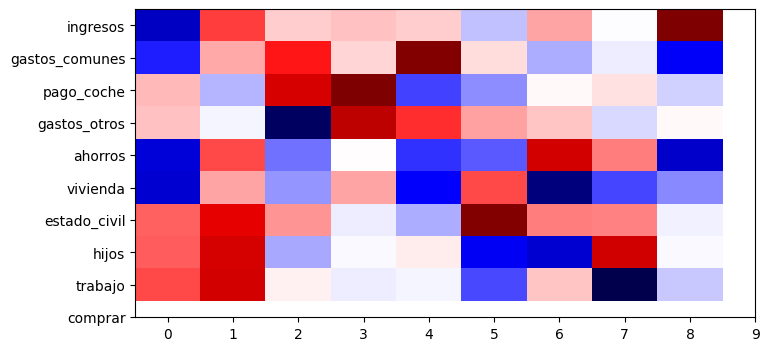

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='seismic', aspect='auto')
plt.yticks(range(len(df.columns)), df.columns)
plt.xticks(range(len(df.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

In [41]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Heatmap(z=modelo_pca.components_[:5], colorscale='RdBu'))
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=list(range(len(X.columns))), ticktext=X.columns, tickangle=90),
    yaxis=dict(tickmode='array', tickvals=[0, 1, 2, 3, 4], ticktext=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
)
fig.show()

In [45]:
pd.DataFrame(
    data = modelo_pca.components_[:5],
    columns = X.columns,
    index = ['PC1', 'PC2', 'PC3', 'PC4','PC5']
)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
PC1,-0.493720,-0.318229,0.123771,0.111876,-0.444650,-0.462609,0.252279,0.259859,0.290248
PC2,0.306959,0.147373,-0.091641,0.000112,0.288435,0.148985,0.469044,0.521894,0.527156
PC3,0.091419,0.363453,0.516144,-0.701986,-0.191767,-0.140513,0.172885,-0.112184,0.036910
PC4,0.111222,0.081630,0.780268,0.590704,0.022839,0.150085,-0.007663,0.007404,-0.007493
PC5,0.088897,0.763006,-0.265554,0.330744,-0.289002,-0.365556,-0.104639,0.043668,0.000009


## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - Un clasificador
3. Entrena
4. Predice con test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de parámetros y componentes mejoraría el accuracy en test?
8. Vuelve a iterar de nuevo con un gridsearch
9. Guarda tu mejor modelo

In [51]:
df.head(2)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0


In [62]:
X=df.drop('comprar',axis=1)
y=df.comprar

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('classifier', SVC())  ])

#Entrenar el modelo
pipeline.fit(x_train, y_train)

##Predecir 
predictions = pipeline.predict(x_test)


In [54]:
x_train.shape,x_test.shape

((161, 9), (41, 9))

In [56]:
train_accuracy = accuracy_score(y_train, pipeline.predict(x_train))
test_accuracy = accuracy_score(y_test, predictions)

print("Accuracy entrenamiento:", train_accuracy)
print("Accuracy  test:", test_accuracy)

Accuracy entrenamiento: 0.8881987577639752
Accuracy  test: 0.7804878048780488


In [57]:
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix

array([[22,  2],
       [ 7, 10]], dtype=int64)

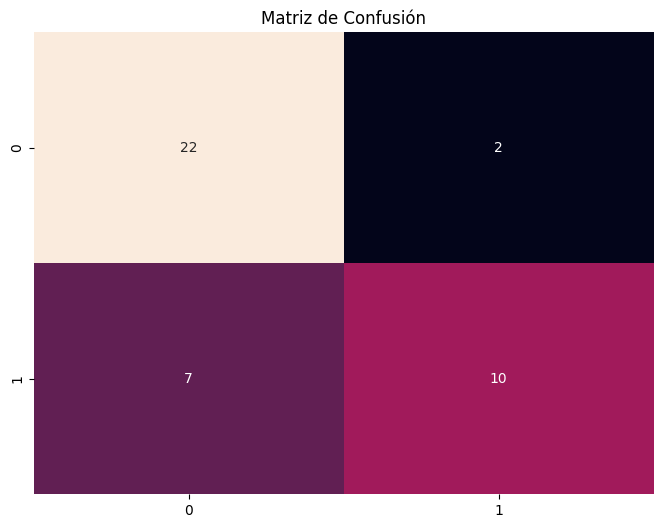

In [60]:
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True,  cbar=False)
plt.title("Matriz de Confusión")
plt.show()

In [65]:
recall_score(y_test,predictions)


0.5882352941176471

Para guardar el modelo: usar libreria pickle MIRAR LO DE DAVID